# Introduction

## Business Problem Summary

Abodes by Abhineet, aka Ab<sup>2</sup>, is a company that buys, renovates and resells homes. Ab<sup>2</sup> has seen an exponential take off over the past year and no longer has the staff to sort through all of the home listings in their area of operations - King's County in Seattle, Washington. With their extra capital they have decided to bring on a data scientist whose first responsibility is to create a tool that will identify sale listings worth investigating. Ab<sup>2</sup> has access to a large dataset of homes sold in the county in 2014 and 2015, and will provide it to the analyst.

## Workflow Outline

This notebook will follow the standard machine learning workflow, OSEMIN:

1. Obtain the data by reading in our data file.
2. Scrub the data by dealing with null values, incorrect information, identifying and removing useless information.
3. Explore the data by looking at scatter plots, histograms, and pair plots. 
4. Model data, starting with a baseline model and then improving upon it based on transformations.
5. Interpret results by discussing coefficients and features of the model. 

# OSEMIN

## Obtain!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed (supposedly, but we think it actually means 'Has a view' and is rated 1-4, with a 0 being no view)
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Observations:

1. `date` is type:object so may want to recast as datetime
2. `waterfront`, `view`, `yr_renovated` are missing values
3. `sqft_basement` has a datatype of object
4. `id` will be useful for checking for duplicates, but otherwise can probably remove
5. Need to check relationship between `sqft_living`, `sqft_above` and `sqft_basement`
6. `grade` and `condition` columns seem to mean basically the same thing

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There will be more to say about this in the 'Explore' section, but for now we should check out those houses with less than one bathroom, and the one with 33 bedrooms.

## Scrub!

### Missing Values

We observed that `waterfront`, `view`, and `yr_renovated` are missing values. Let's deal with those first.

In [5]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Most homes are not waterfront property. It seems likely that if it was waterfront property, it would not be missing a value for this field. Therefore, I will replace all nulls in this column with zeros.

In [6]:
df['waterfront'] = df.waterfront.fillna(0)

In [7]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [8]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Hmmm.. looks like a similar issue with `view`. Again, since such a large majority are marked as not having a view, and if they did have a view they would probably have included that information, and compared to waterfront their are very few NaNs (maybe 60) let's just fill with zeros.

In [9]:
df['view'] = df.view.fillna(0)

In [10]:
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [11]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
df.yr_renovated.isna().sum()

3842

So this column seems to have the year if it has been renovated and a zero otherwise. This one also has a pretty significant number of values missing out, nearly 20 percent at around 3800 missing records. While it does feel risky to fill these NaNs with zeros as well, it is justified by similar logic to the categories above, and in relation to our business case. Seeing as Abhineet's business runs on renovating and reselling houses at a profit, we have to assume that houses that have been renovated sold for more than they otherwise would have at least most of the time. In that way, looking at recently renovated and sold houses could actually negatively impact the model, since we assume these datapoints contribute to rightward skew relative to the rest of the dataset. Similarly to view and waterfront, it seems likely that if the home has been renovated recently, say within the last ten years, we would have that information. We would not want to buy a home that has been remodeled so recently anyway. Therefore, either it has been renovated but we don't know since it has been a while since it has been renovated, and thus it is the same as not having been renovated, since we will need to make modern changes to appliances and decor.

Let's look at a couple things to check these assumptions. Let's compare selling prices from for homes renovated or otherwise.

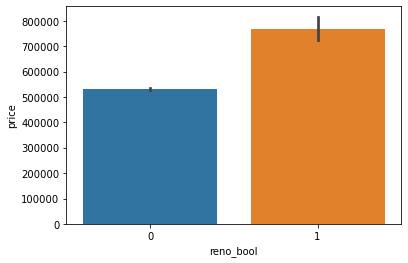

In [13]:
# need to first deal with date column being type object

df['date'] = pd.to_datetime(df['date'])

# create a boolean column for renovated or not, set NaNs to not renovated

df['reno_bool'] = df.yr_renovated.apply(lambda x: 0 if x == False else ( 0 if pd.isna(x) else 1))
sns.barplot(x='reno_bool', y='price', data=df);

In [14]:
df.reno_bool.value_counts()

0    20853
1      744
Name: reno_bool, dtype: int64

So, this is not perfect, because we don't know what the homes might have sold for otherwise and there are very few renovated homes sold, etc etc, but they are definitely priced higher than homes that have not been renovated. Finally, let's just look at homes that don't have information on `yr_renovated` to see if anything sticks out.

In [15]:
missing_reno = df[pd.isna(df.yr_renovated) == True]

In [16]:
missing_reno.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697,0
23,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,0.0,0.0,...,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386,0
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,0
28,5101402488,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235,0


In [17]:
missing_reno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
count,3.842000e+03,3.842000e+03,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,0.0,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.0
mean,4.564007e+09,5.386170e+05,3.348777,2.094157,2061.979178,14254.275377,1.486075,0.006507,0.241020,3.406299,7.640812,1774.889381,1970.499219,NaN,98078.811296,47.563688,-122.216395,1971.422436,12258.317022,0.0
std,2.878860e+09,3.583446e+05,0.895277,0.775021,920.365509,38026.156942,0.545270,0.080414,0.781659,0.641928,1.183317,832.655119,29.477479,NaN,53.631060,0.138573,0.139988,686.522626,25102.870212,0.0
min,3.600072e+06,7.800000e+04,1.000000,0.500000,500.000000,635.000000,1.000000,0.000000,0.000000,1.000000,4.000000,490.000000,1900.000000,NaN,98001.000000,47.162200,-122.511000,460.000000,651.000000,0.0
25%,2.099175e+09,3.229760e+05,3.000000,1.500000,1410.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1950.000000,NaN,98033.000000,47.475625,-122.330000,1470.000000,5058.500000,0.0
50%,3.886954e+09,4.500000e+05,3.000000,2.250000,1900.000000,7665.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,1974.000000,NaN,98070.000000,47.577150,-122.236000,1820.000000,7624.500000,0.0
75%,7.300400e+09,6.433750e+05,4.000000,2.500000,2530.000000,10706.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,1996.000000,NaN,98118.000000,47.681575,-122.128000,2320.000000,10015.500000,0.0
max,9.900000e+09,5.570000e+06,8.000000,6.750000,9200.000000,881654.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,2015.000000,NaN,98199.000000,47.777500,-121.315000,5790.000000,392040.000000,0.0


While there are some minor differences, the quartiles and other descriptors are very similar to the dataset as a whole. There doesn't seem to be any notable differences, so since the ones with missing information seem to be more or less similar to the bulk of the main dataset, we will make them similar to the main dataset. With a large majority of the main dataset being homes that have never been renovated, will we thus fill the missing values with a zero for 'never renovated' as suggested earlier.

In [18]:
df['yr_renovated'] = df.yr_renovated.fillna(0)

In [19]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

Keeping in mind our business problem, we should remember at the end of the scrubbing process that we will have to think about whether or not to simply drop rows for homes that have been renovated, say, after 2010 (within the last ten years and so already modernized), and similarly for homes built after 2010 or perhaps even earlier.

### Dealing with similar columns

We saw that `grade` and `condition` seem similar, as well as there is likely some relationship between `sqft_living`, `sqft_above` and `sqft_basement`. `sqft_basement` is also an object data type so let's fix that.

In [20]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
415.0         1
3480.0        1
768.0         1
2570.0        1
2500.0        1
Name: sqft_basement, Length: 304, dtype: int64

Hmm, so really it has some missing values and all are cast as strs since they used ? to denote basement or not. Again, here I am just going to quickly replace the '?' with 0 for no basement since it seems like it would be noted if it was there.

In [21]:
df['sqft_basement'] = df.sqft_basement.replace(to_replace = '?',value = '0.0')

In [22]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
3480.0        1
415.0         1
2850.0        1
2610.0        1
2500.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [23]:
df['sqft_basement'] = df.sqft_basement.astype(float)

In [24]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1816.0        1
2720.0        1
1008.0        1
2250.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

Sweet, that is fixed. Let's quickly investigate whether we can get rid of any of these columns. Let's plot a distribution of the difference between `sqft_above` and the quantity `sqft_living - sqft_basement`.

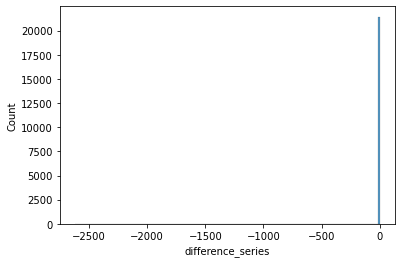

In [26]:
df['difference_series'] = pd.Series( df.sqft_above - (df.sqft_living - df.sqft_basement))
sns.histplot(data = df, x = 'difference_series', binwidth = 10);

Okay, so this is telling me, except for a couple outliers potentially that are impossible to see on the graph and are possibly because of one or two mistakes in filling in zeros for '?' as we did steps ago, that `sqft_above` is just equal to the square footage of the home without the basement. I would guess that, since `sqft_living` is an aggregate of the other two columns, we can drop that column and not lose any information about the data. By keeping above and basement, we indirectly retain what percent of livable sq footage is above and below, whereas if we kept only `sqft_living` we would lose that. Before dropping that column, let's see how many there are with a difference greater than 10 sqft.

In [27]:
df[df['difference_series'] <= -10].difference_series.count()

170

Okay, so for most of them the supposition seems to be true. For the ones that it isn't, there is few enough of them that I feel fine removing those rows. So let's first remove the rows then drop the sqft_living column altogether. 

In [28]:
df2 = df[df['difference_series'] >= -10]

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21427 non-null  int64         
 1   date               21427 non-null  datetime64[ns]
 2   price              21427 non-null  float64       
 3   bedrooms           21427 non-null  int64         
 4   bathrooms          21427 non-null  float64       
 5   sqft_living        21427 non-null  int64         
 6   sqft_lot           21427 non-null  int64         
 7   floors             21427 non-null  float64       
 8   waterfront         21427 non-null  float64       
 9   view               21427 non-null  float64       
 10  condition          21427 non-null  int64         
 11  grade              21427 non-null  int64         
 12  sqft_above         21427 non-null  int64         
 13  sqft_basement      21427 non-null  float64       
 14  yr_bui

Cool, so now we can drop `difference_series` and `sqft_living`.

In [30]:
df2 = df2.drop(columns = ['difference_series','sqft_living']).reset_index()

In [31]:
df2 = df2.drop(columns = 'index')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21427 entries, 0 to 21426
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21427 non-null  int64         
 1   date           21427 non-null  datetime64[ns]
 2   price          21427 non-null  float64       
 3   bedrooms       21427 non-null  int64         
 4   bathrooms      21427 non-null  float64       
 5   sqft_lot       21427 non-null  int64         
 6   floors         21427 non-null  float64       
 7   waterfront     21427 non-null  float64       
 8   view           21427 non-null  float64       
 9   condition      21427 non-null  int64         
 10  grade          21427 non-null  int64         
 11  sqft_above     21427 non-null  int64         
 12  sqft_basement  21427 non-null  float64       
 13  yr_built       21427 non-null  int64         
 14  yr_renovated   21427 non-null  float64       
 15  zipcode        2142

Okay, so now between the `grade` and `condition` columns, the `condition` seems user defined while `grade` is based on a King County system and may be evaluated by an appraiser or some such, though we don't really know for sure. At any rate, `grade` is better since it has more tiers, is associated with a rubric of some kind, and does seem to have at least somewhat of a linear relationship with price, so let's keep that column and drop `condition`.

In [32]:
df2 = df2.drop(columns = 'condition')

### Checking on duplicate entries

Since we have an `id` column with unique ID numbers for each house, let's check for duplicates.

In [33]:
df2.duplicated("id").sum()

176

In [34]:
duplicates = df2[df2.duplicated(subset = "id", keep = False) == True]

In [35]:
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 93 to 21395
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             351 non-null    int64         
 1   date           351 non-null    datetime64[ns]
 2   price          351 non-null    float64       
 3   bedrooms       351 non-null    int64         
 4   bathrooms      351 non-null    float64       
 5   sqft_lot       351 non-null    int64         
 6   floors         351 non-null    float64       
 7   waterfront     351 non-null    float64       
 8   view           351 non-null    float64       
 9   grade          351 non-null    int64         
 10  sqft_above     351 non-null    int64         
 11  sqft_basement  351 non-null    float64       
 12  yr_built       351 non-null    int64         
 13  yr_renovated   351 non-null    float64       
 14  zipcode        351 non-null    int64         
 15  lat            351 n

In [36]:
duplicates.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
count,3.510000e+02,3.510000e+02,351.00000,351.000000,351.000000,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,4.504499e+09,4.192978e+05,3.28490,1.807692,11694.336182,1.264957,0.0,0.136752,7.074074,1480.512821,261.253561,1960.051282,45.116809,98086.774929,47.547436,-122.237499,1777.532764,10698.353276,0.022792
std,2.854431e+09,2.953285e+05,1.03027,0.735613,22856.037950,0.433784,0.0,0.662109,1.173607,635.293650,416.591778,25.277380,295.845685,56.882014,0.134059,0.130735,612.047737,16483.385635,0.149453
min,1.000102e+06,8.200000e+04,1.00000,0.750000,1092.000000,1.000000,0.0,0.000000,5.000000,580.000000,0.000000,1900.000000,0.000000,98001.000000,47.272900,-122.463000,810.000000,1334.000000,0.000000
25%,1.974300e+09,2.339500e+05,3.00000,1.000000,5573.000000,1.000000,0.0,0.000000,6.000000,1045.000000,0.000000,1943.500000,0.000000,98034.000000,47.459000,-122.337500,1360.000000,6000.000000,0.000000
50%,4.031001e+09,3.400000e+05,3.00000,1.750000,8043.000000,1.000000,0.0,0.000000,7.000000,1300.000000,0.000000,1959.000000,0.000000,98077.000000,47.542700,-122.284000,1610.000000,7980.000000,0.000000
75%,7.398600e+09,5.250000e+05,4.00000,2.250000,10140.000000,1.500000,0.0,0.000000,7.000000,1725.000000,500.000000,1978.000000,0.000000,98126.000000,47.673800,-122.172000,2020.000000,9602.500000,0.000000
max,9.834201e+09,1.940000e+06,6.00000,4.500000,224442.000000,3.000000,0.0,4.000000,12.000000,4540.000000,2330.000000,2013.000000,1990.000000,98199.000000,47.773700,-121.734000,4060.000000,183897.000000,1.000000


In [37]:
duplicates.head(6)

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
93,6021501535,2014-07-25,430000.0,3,1.50,5000,1.0,0.0,0.0,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,0
94,6021501535,2014-12-23,700000.0,3,1.50,5000,1.0,0.0,0.0,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,0
310,4139480200,2014-06-18,1380000.0,4,3.25,12103,1.0,0.0,3.0,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,0
311,4139480200,2014-12-09,1400000.0,4,3.25,12103,1.0,0.0,3.0,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,0
321,7520000520,2014-09-05,232000.0,2,1.00,12092,1.0,0.0,0.0,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
322,7520000520,2015-03-11,240500.0,2,1.00,12092,1.0,0.0,0.0,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1


In [38]:
duplicates.reno_bool.value_counts()

0    343
1      8
Name: reno_bool, dtype: int64

Hmm.. based on this, the houses weren't necessarily bought and then resold because they were renovated. We would have to backtrack, however, to be sure that these were houses we didn't fill in zeros for when we were filling in missing values for `yr_renovated`. It seems that, for a house to be bought and then sold again, within the same year (or two, since we have some 2015 data) it was either bought and renovated and then resold or it was a mistake and ended up in the system twice somehow. Let's quickly look at the couple that were definitely renovated.

In [39]:
duplicates[duplicates.reno_bool == True].id

321     7520000520
322     7520000520
709     8820903380
710     8820903380
3917    1825069031
3918    1825069031
8353    1721801010
8354    1721801010
Name: id, dtype: int64

In [40]:
for idx, duplicate_id in enumerate(duplicates[duplicates.reno_bool == True].id):
    if idx % 2:
        print('=====================================')
        print(df2[df2['id'] == duplicate_id])
        print('=====================================')

             id       date     price  bedrooms  bathrooms  sqft_lot  floors  \
321  7520000520 2014-09-05  232000.0         2        1.0     12092     1.0   
322  7520000520 2015-03-11  240500.0         2        1.0     12092     1.0   

     waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
321         0.0   0.0      6         960          280.0      1922   
322         0.0   0.0      6         960          280.0      1922   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
321        1984.0    98146  47.4957 -122.352           1820        7460   
322        1984.0    98146  47.4957 -122.352           1820        7460   

     reno_bool  
321          1  
322          1  
             id       date     price  bedrooms  bathrooms  sqft_lot  floors  \
709  8820903380 2014-07-28  452000.0         6       2.25     13579     2.0   
710  8820903380 2015-01-02  730000.0         6       2.25     13579     2.0   

     waterfront  view  grade  sqft_abov

Okay, at least for those, they may actually be the same house that sold twice for different prices. Could it be that they were renovated a second time and this isn't recorded? Anyway, let's see if it looks the same for a few of the ones that didn't say they were renovated. One of them did sell for exactly the same price, but some time apart. It is not clear why the others sold for more or less; it could be that someone realized they could flip the house for more even without renovating it again.

In [41]:
for idx,duplicate_id in enumerate(duplicates[duplicates.reno_bool == False].id):
    if idx > 11:
        break
    elif idx % 2:
        print('=====================================')
        print(df2[df2['id'] == duplicate_id])
        print('=====================================')

            id       date     price  bedrooms  bathrooms  sqft_lot  floors  \
93  6021501535 2014-07-25  430000.0         3        1.5      5000     1.0   
94  6021501535 2014-12-23  700000.0         3        1.5      5000     1.0   

    waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
93         0.0   0.0      8        1290          290.0      1939   
94         0.0   0.0      8        1290          290.0      1939   

    yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  \
93           0.0    98117  47.687 -122.386           1570        4500   
94           0.0    98117  47.687 -122.386           1570        4500   

    reno_bool  
93          0  
94          0  
             id       date      price  bedrooms  bathrooms  sqft_lot  floors  \
310  4139480200 2014-06-18  1380000.0         4       3.25     12103     1.0   
311  4139480200 2014-12-09  1400000.0         4       3.25     12103     1.0   

     waterfront  view  grade  sqft_above  sqft_base

Hmm... It's hard to know what to do with these. Some of them sold within the same year for similar prices, some of them sold in the same year for radically different prices, and one of them even sold for less, but all the other information is always exactly the same. They will both impact a linear fit more or less equally and seem like legitimate data and there is not that many of them so I'm just going to leave them in. We should no longer have any need for the `id` column so I'm just going to drop it.

In [42]:
df2 = df2.drop(columns = 'id')

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21427 entries, 0 to 21426
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21427 non-null  datetime64[ns]
 1   price          21427 non-null  float64       
 2   bedrooms       21427 non-null  int64         
 3   bathrooms      21427 non-null  float64       
 4   sqft_lot       21427 non-null  int64         
 5   floors         21427 non-null  float64       
 6   waterfront     21427 non-null  float64       
 7   view           21427 non-null  float64       
 8   grade          21427 non-null  int64         
 9   sqft_above     21427 non-null  int64         
 10  sqft_basement  21427 non-null  float64       
 11  yr_built       21427 non-null  int64         
 12  yr_renovated   21427 non-null  float64       
 13  zipcode        21427 non-null  int64         
 14  lat            21427 non-null  float64       
 15  long           2142

### Checking on weird values

In [44]:
no_baths = df2[df2.bathrooms < 1]
no_baths.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
206,2014-11-23,180250.0,2,0.75,9600,1.0,0.0,0.0,6,900,0.0,1941,0.0,98166,47.4604,-122.339,1250,14280,0
262,2014-10-27,369900.0,1,0.75,10079,1.0,1.0,4.0,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267,0
347,2014-06-04,299000.0,1,0.75,12120,1.0,0.0,0.0,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207,0
461,2014-05-23,80000.0,1,0.75,5050,1.0,0.0,0.0,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500,0
564,2014-12-18,405000.0,2,0.75,15029,1.0,0.0,0.0,6,870,290.0,1937,0.0,98014,47.6929,-121.870,1870,25346,0


In [45]:
no_baths.bathrooms.value_counts()

0.75    71
0.50     4
Name: bathrooms, dtype: int64

The internet tells me that three quarters of a bathroom is like a sink and toilet and small standup shower, no tub. These could be replaced with a full bathroom if we like, probably. Half a bathroom, however, would probably mean no installed shower at all. There are only 4, so it might not be worth doing anything, and maybe they are like little vacation cottages or something, but it is odd so let's look at them.

In [46]:
half_baths = df2[df2.bathrooms < .75]
half_baths.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
2241,2014-10-03,273000.0,2,0.5,7750,1.0,0.0,0.0,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976,0
10324,2015-01-14,109000.0,2,0.5,6900,1.0,0.0,0.0,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040,0
11564,2014-08-14,255000.0,1,0.5,1642,1.0,0.0,0.0,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992,0
11929,2014-12-12,312500.0,4,0.5,5570,2.0,0.0,0.0,8,2300,0.0,1996,0.0,98092,47.3285,-122.168,1820,6371,0


Only half a bathroom seems very strange. They are on the lower end of the price spectrum, and the first three are very small and old, but it would be strange for the last one to actually have four bedrooms, 2300 sqft of living space and only half a bathroom. We'll leave the other three as outliers for now but get rid of the last one.

In [47]:
df3 = df2.drop(11929)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21426 entries, 0 to 21426
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21426 non-null  datetime64[ns]
 1   price          21426 non-null  float64       
 2   bedrooms       21426 non-null  int64         
 3   bathrooms      21426 non-null  float64       
 4   sqft_lot       21426 non-null  int64         
 5   floors         21426 non-null  float64       
 6   waterfront     21426 non-null  float64       
 7   view           21426 non-null  float64       
 8   grade          21426 non-null  int64         
 9   sqft_above     21426 non-null  int64         
 10  sqft_basement  21426 non-null  float64       
 11  yr_built       21426 non-null  int64         
 12  yr_renovated   21426 non-null  float64       
 13  zipcode        21426 non-null  int64         
 14  lat            21426 non-null  float64       
 15  long           2142

In [48]:
df3[df3.bathrooms < .75].head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
2241,2014-10-03,273000.0,2,0.5,7750,1.0,0.0,0.0,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976,0
10324,2015-01-14,109000.0,2,0.5,6900,1.0,0.0,0.0,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040,0
11564,2014-08-14,255000.0,1,0.5,1642,1.0,0.0,0.0,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992,0


In [49]:
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')

In [50]:
many_beds = df3[df3.bedrooms > 10]
many_beds.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
8671,2014-08-21,520000.0,11,3.00,4960,2.0,0.0,0.0,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,1
15722,2014-06-25,640000.0,33,1.75,6000,1.0,0.0,0.0,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,0


The first one could be real, the second one definitely not based on the liveable area, so let's remove that one. We could guess that it has 3 bedrooms instead, but it's only one row.

In [51]:
df4 = df3.drop(15722)
df4 = df4.reset_index()
df4 = df4.drop(columns = 'index')

## Explore!

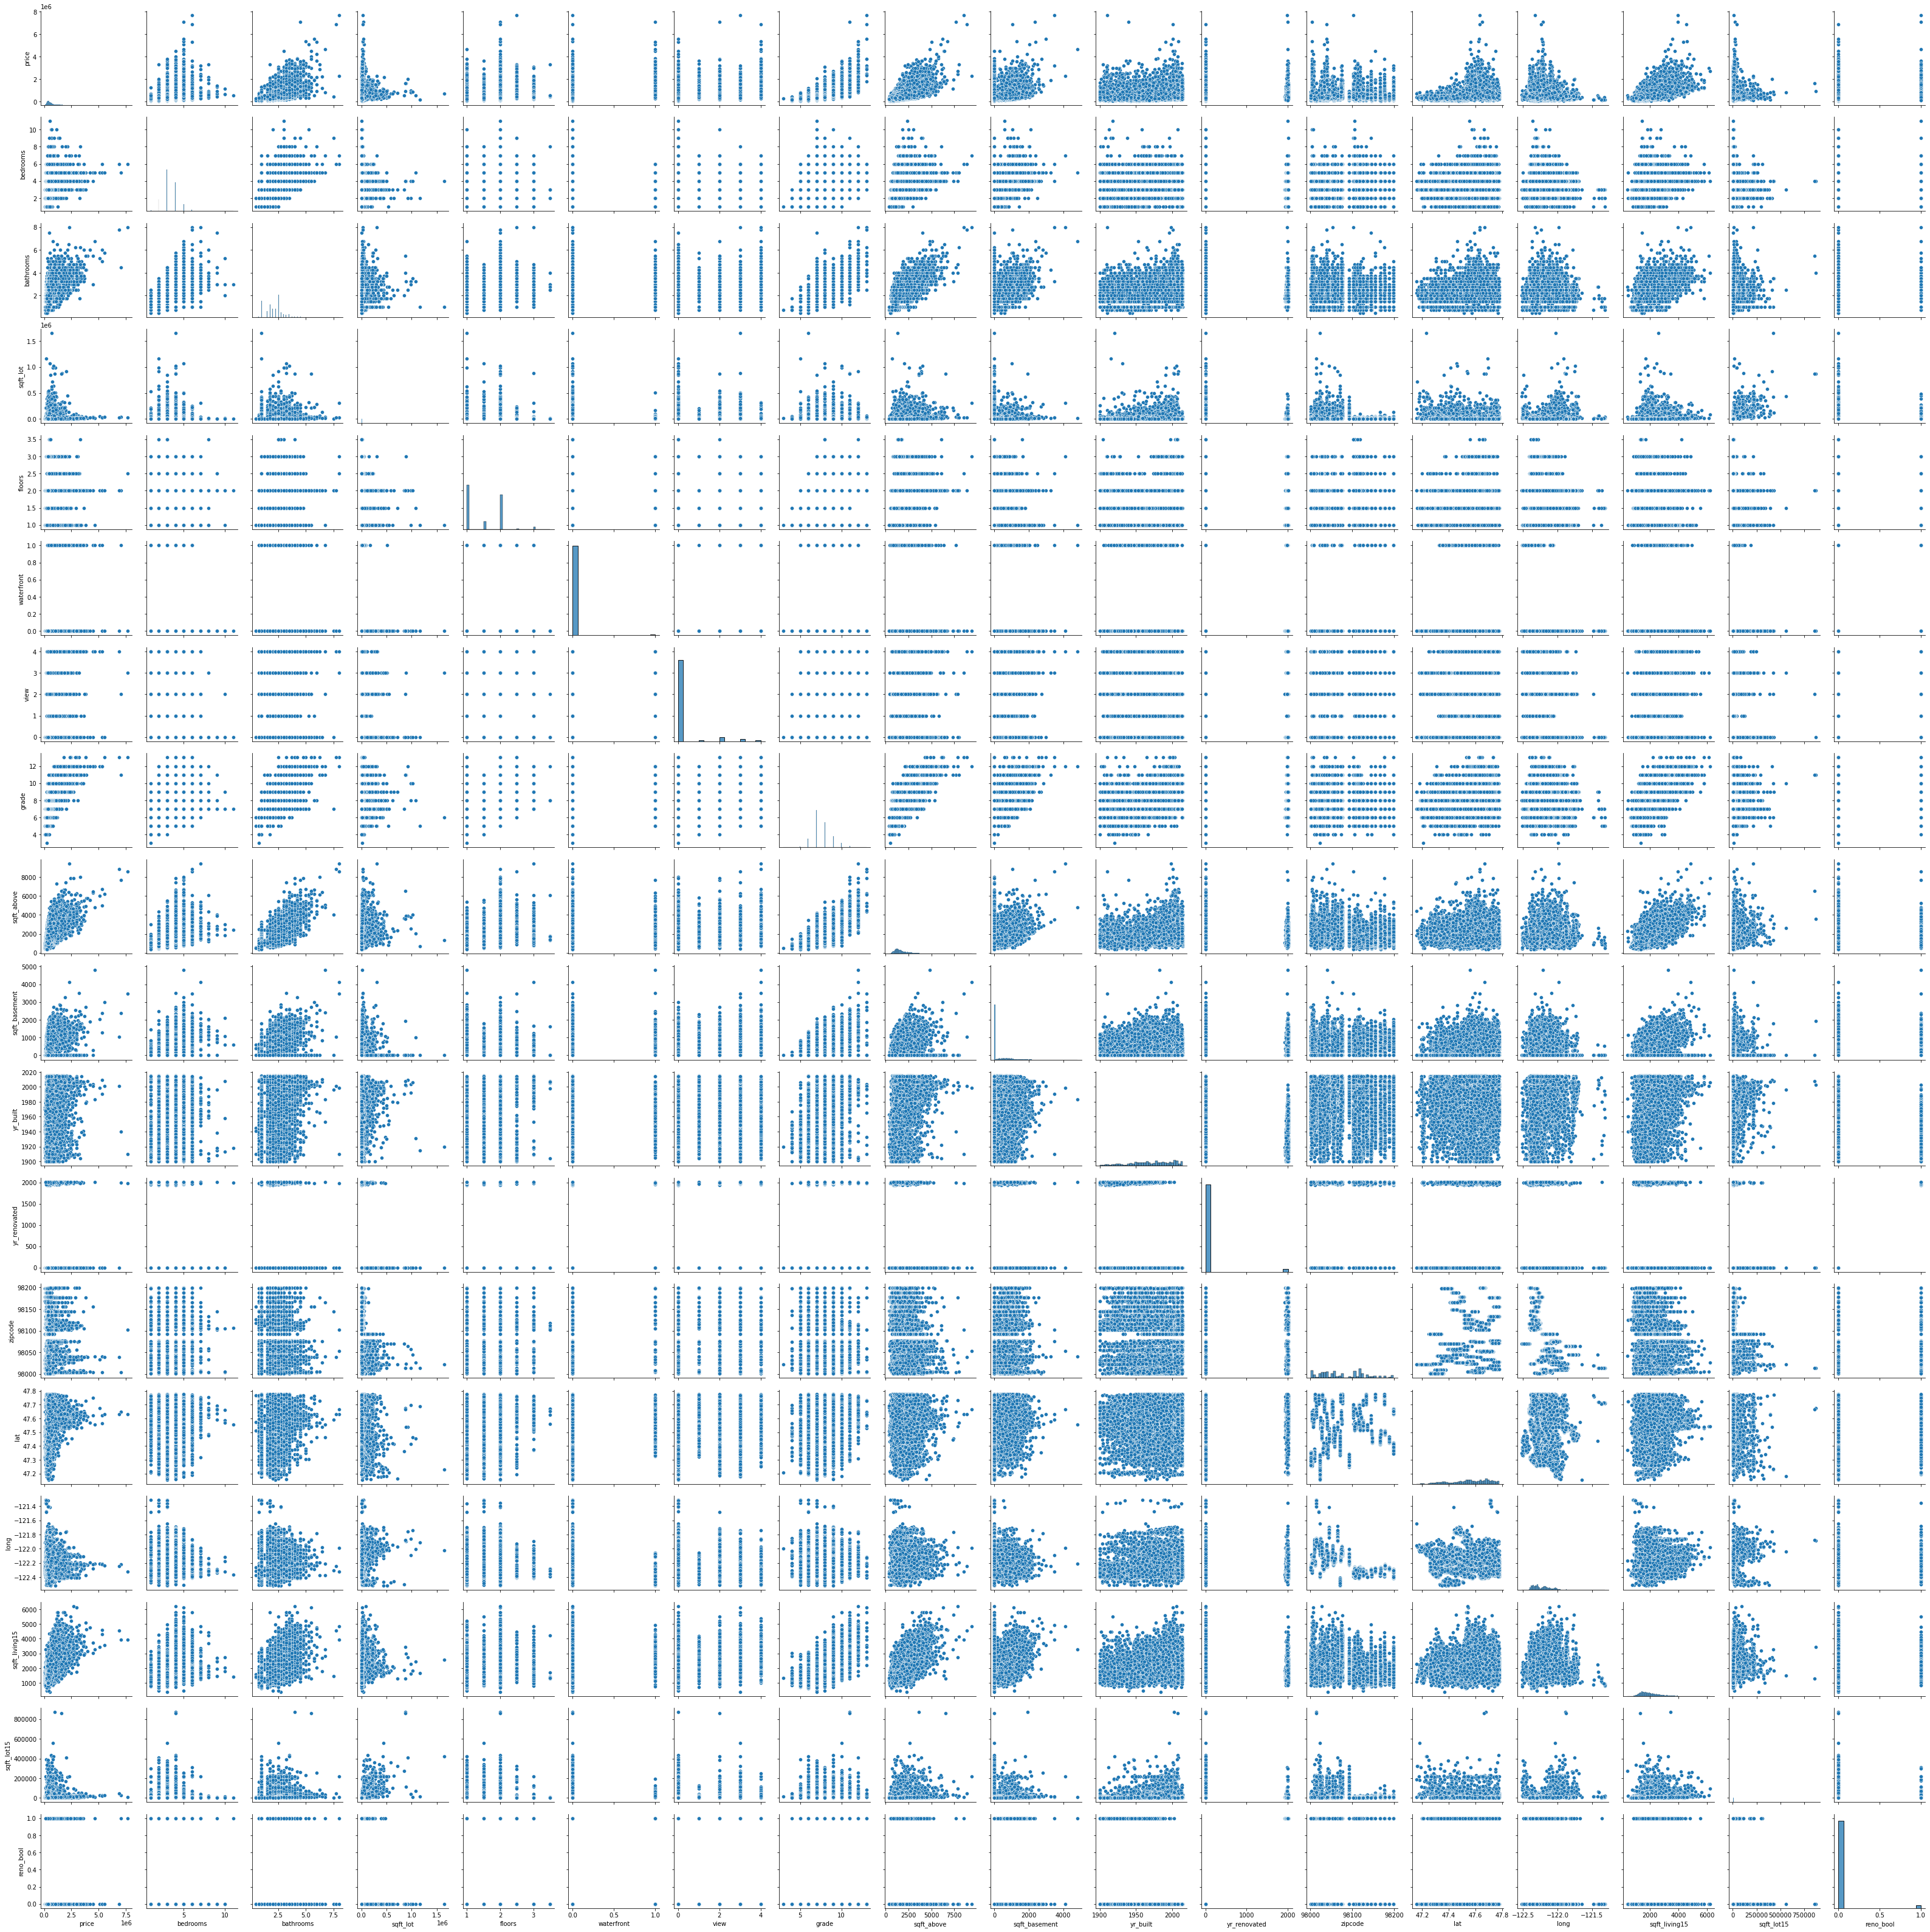

In [52]:
sns.pairplot(data = df4);

Observations:

1. `price` looks like it may have linear relationships with respect to `bedrooms`, `bathrooms`, `sqft_lot`, `grade`, `sqft_above`, `sqft_living15`
2. `floors`, `waterfront`, `view`, `grade`, `condition`, `zipcode`, and `reno_bool` are all likely best interpreted as categorical columns, and maybe `bedrooms` and `bathrooms` 
3. A lot of the histograms look right-skewed, so some log transformations may be useful.
4. There are some obvious outliers in some of the scatter plots; will have to deal with these later.
5. There are some IVs that look like they are linearly related, mostly between the IVs related to space or number of rooms.

In [53]:
df4.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_bool
count,2.142500e+04,21425.000000,21425.000000,2.142500e+04,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000
mean,5.398554e+05,3.369802,2.114597,1.510979e+04,1.495426,0.006721,0.231599,7.657503,1790.603174,287.983244,1971.064037,68.377830,98077.848635,47.559943,-122.213667,1986.869965,12744.291109,0.034259
std,3.674319e+05,0.902528,0.768867,4.149682e+04,0.539884,0.081708,0.762768,1.174369,828.645048,440.833013,29.349857,363.062941,53.504603,0.138683,0.140816,685.997533,27156.077876,0.181898
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.210000e+05,3.000000,1.750000,5.043000e+03,1.000000,0.000000,0.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470500,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,7.620000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571700,-122.229000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,1.067500e+04,2.000000,0.000000,0.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10080.000000,0.000000
max,7.700000e+06,11.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


More observations:
1. The lowest and highest price may be outside what Abhineet is generally looking for in his business. The median price is ~450k while the mean is around 540k, again indicating a right skew. It may be worth limiting the dataset to a certain price range if it improves our model.
2. There are buildings with half floors, but that could be a split level type of plan?
3. For the numerical columns, there are different scales in magnitude. It may be worth scaling things between 1 and 0 to force things to be on the same magnitude.

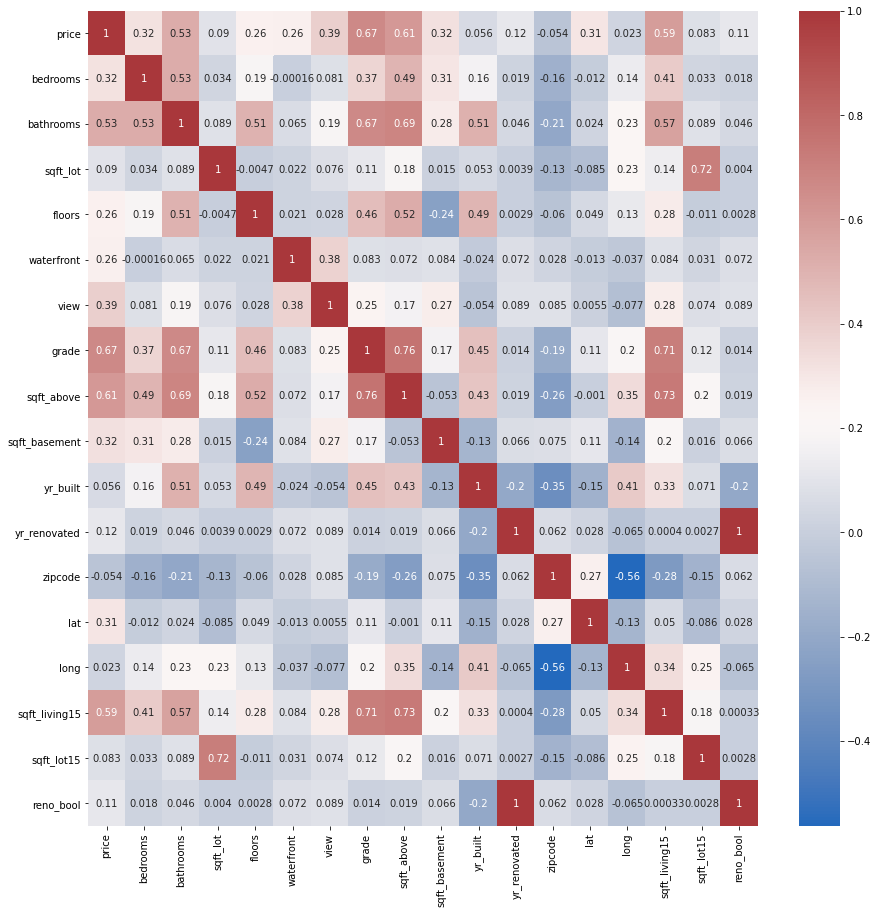

In [54]:
plt.figure(figsize = (15,15))
sns.heatmap(data = df4.corr(),annot = True, cmap = 'vlag');

Observations:
1. Price has at least decent correlation with 8-10 different columns
2. There is some definite collinearity between some of the columns; it will be worth trying to implement interactions in the modeling step. 

## Model!

In [55]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats

### A baseline model

In [58]:
outcome = 'price'
predictors = df4.drop('price', axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [59]:
baseline_model = ols(formula = formula, data = df4).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     130.7
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:            -2.9180e+05
No. Observations:               21425   AIC:                         5.844e+05
Df Residuals:                   21036   BIC:                         5.875e+05
Df Model:                         388                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.262e+07   2.92e+06      4.317      0.000    6.89e+06    1.84e+07
date[T.Timestamp('2014-05-03 00:00:00')]  1.741e+05   1.03e+05      1.685      0.092   -2.85e+04    3.77e+05
date[T.Timestamp('2014-05-04 00:00:00')] -7.188e+04   9.31e+04     -0.772      0.440   -2.54e+05    1.11e+05
date[T.Timestamp('2014-05-05 00:00:00')]  1.509e+04   3.32e+04      0.455      0.649   -4.99e+04    8.01e+04
date[T.Timestamp('2014-05-06 00:00:00')] -6532.4664    3.3e+04     -0.198      0.843   -7.12e+04    5.81e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.507e+04   3.23e+04      0.467      0.640   -4.82e+04    7.83e+04
date[T.Timestamp('2014-05-08 00:00:00')]  4.439e+04   3.33e+04      1.335      0.182   -2.08e+04     1.1e+05
date[T.Timestamp('2014-05-09 00:00:00')]  -1.53e+04   3.32e+04     -0.462      0.644   -8.03e+04    4.97e+04
date[T.Timestamp('2014-05-10 00:00:00')]  2.357e+04   9.31e+04      0.253      0.800   -1.59e+05    2.06e+05
date[T.Timestamp('2014-05-11 00:00:00')]  6.325e+04   1.44e+05      0.439      0.661   -2.19e+05    3.46e+05
date[T.Timestamp('2014-05-12 00:00:00')]  2.223e+04   3.34e+04      0.666      0.505   -4.32e+04    8.76e+04
date[T.Timestamp('2014-05-13 00:00:00')]  4.292e+04   3.29e+04      1.305      0.192   -2.16e+04    1.07e+05
date[T.Timestamp('2014-05-14 00:00:00')]  6641.2128   3.33e+04      0.200      0.842   -5.85e+04    7.18e+04
date[T.Timestamp('2014-05-15 00:00:00')]  6398.8595   3.32e+04      0.193      0.847   -5.86e+04    7.14e+04
date[T.Timestamp('2014-05-16 00:00:00')] -1083.9086    3.4e+04     -0.032      0.975   -6.77e+04    6.55e+04
date[T.Timestamp('2014-05-17 00:00:00')]  6.449e+04   2.02e+05      0.319      0.750   -3.32e+05    4.61e+05
date[T.Timestamp('2014-05-18 00:00:00')]  2.143e+04   7.98e+04      0.269      0.788   -1.35e+05    1.78e+05
date[T.Timestamp('2014-05-19 00:00:00')]  1.246e+04    3.3e+04      0.378      0.706   -5.22e+04    7.71e+04
date[T.Timestamp('2014-05-20 00:00:00')]  1.644e+04   3.09e+04      0.532      0.595   -4.42e+04     7.7e+04
date[T.Timestamp('2014-05-21 00:00:00')]  6956.0727   3.23e+04      0.216      0.829   -5.63e+04    7.02e+04
date[T.Timestamp('2014-05-22 00:00:00')]  9104.4986   3.24e+04      0.281      0.779   -5.44e+04    7.26e+04
date[T.Timestamp('2014-05-23 00:00:00')]  8693.5677    3.3e+04      0.264      0.792    -5.6e+04    7.33e+04
date[T.Timestamp('2014-05-24 00:00:00')]  6.138e+04   6.54e+04      0.939      0.348   -6.67e+04    1.89e+05
date[T.Timestamp('2014-05-25 00:00:00')] -9.029e+04   9.31e+04     -0.970      0.332   -2.73e+05    9.22e+04
date[T.Timestamp('2014-05-26 00:00:00')] -1.644e+04   7.51e+04     -0.219      0.827   -1.64e+05    1.31e+05
date[T.Timestamp('2014-05-27 00

Observations:
1. The algorithm is hadnling the date column as a categorical variable, will have to deal with that.
2. The coeff for bedrooms is negative; that seems wrong.
3. `floors` has a high p-value, maybe not a good column to consider in the model, or needs to be considered as a category.

Let's quickly look at a scatter of date and price to see if it's worth trying to keep in the model.

<AxesSubplot:xlabel='date', ylabel='price'>

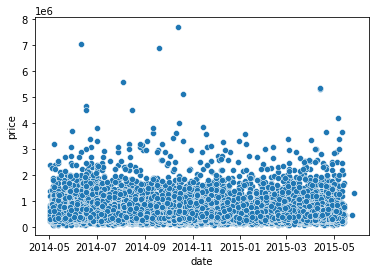

In [61]:
sns.scatterplot(data = df4, x = "date", y = "price")

<AxesSubplot:xlabel='date', ylabel='price'>

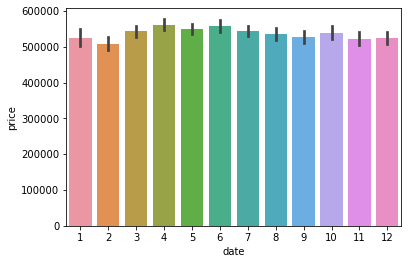

In [62]:
sns.barplot(data = df4, x = df4.date.dt.month, y = 'price')

It doesn't look like there is any extremely important relationship between price and selling date, especially not a linear one. Let's remove that column from the predictors dataframe.

In [65]:
predictors = predictors.drop(columns = 'date')

In [66]:
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

Let's rerun the model to see if it has changed any (and to get a cleaner baseline summary to reference).

In [67]:
baseline_model = ols(formula = formula, data = df4).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2931.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:24:46   Log-Likelihood:            -2.9207e+05
No. Observations:               21425   AIC:                         5.842e+05
Df Residuals:                   21407   BIC:                         5.843e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.244e+07   2.91e+06      4.269      0.000    6.73e+06    1.81e+07
bedrooms      -3.894e+04   1994.687    -19.521      0.000   -4.28e+04    -3.5e+04
bathrooms      4.426e+04   3284.047     13.478      0.000    3.78e+04    5.07e+04
sqft_lot          0.1183      0.048      2.462      0.014       0.024       0.212
floors         4794.8839   3614.260      1.327      0.185   -2289.336    1.19e+04
waterfront     6.247e+05   1.83e+04     34.155      0.000    5.89e+05    6.61e+05
view           5.403e+04   2137.522     25.279      0.000    4.98e+04    5.82e+04
grade           9.59e+04   2172.819     44.137      0.000    9.16e+04       1e+05
sqft_above      183.2996      3.715     49.343      0.000     176.018     190.581
sqft_basement   155.6182      4.437     35.071      0.000     146.921     164.315
yr_built      -2911.1837     68.770    -42.332      0.000   -3045.977   -2776.390
yr_renovated   3248.4588    478.660      6.787      0.000    2310.249    4186.669
zipcode        -632.9610     32.958    -19.205      0.000    -697.562    -568.360
lat            5.939e+05   1.08e+04     55.113      0.000    5.73e+05    6.15e+05
long          -2.172e+05   1.32e+04    -16.447      0.000   -2.43e+05   -1.91e+05
sqft_living15    20.5763      3.465      5.939      0.000      13.785      27.367
sqft_lot15       -0.3838      0.074     -5.184      0.000      -0.529      -0.239
reno_bool     -6.453e+06   9.55e+05     -6.754      0.000   -8.33e+06   -4.58e+06
==============================================================================
Omnibus:                    17993.713   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1759766.128
Skew:                           3.503   Prob(JB):                         0.00
Kurtosis:                      46.843   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interestingly enough, the model R<sup>2</sup> got a little worse, but I think that was the right thing to do, since the date data did not really meet any requirements for a linear regression. Let's get a base qq plot and RMSE as well.

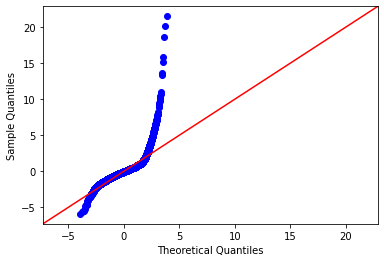

In [69]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(predictors, df4['price'], test_size = 0.25)
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, y_train)
y_pred = baseline_linreg.predict(X_test)
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 201619.2775809699
Test RMSE: 201085.25347577402


#### Defining a function for ease of evaluation

Based on the study groups, we will repeating a lot of these steps every time we want to try a new model. Let's see if we can write it as a function to save ourselves some time.

In [113]:
def evaluate_model(dataframe):
    outcome = 'price'
    predictors = dataframe.drop('price', axis = 1)
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    model = ols(formula = formula, data = dataframe).fit()
    print(model.summary())
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    print('==============================================================================')
    plt.show()
    X_train, X_test, y_train, y_test = train_test_split(predictors, dataframe[outcome], test_size = 0.25)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    mse_train = mean_squared_error(y_train, linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)
    print('==============================================================================')
    print("Train RMSE:", np.sqrt(mse_train))
    print("Test RMSE:", np.sqrt(mse_test))
    print('==============================================================================')
    
    

Let's see if it recreates the baseline model properly.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2931.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:08:47   Log-Likelihood:            -2.9207e+05
No. Observations:               21425   AIC:                         5.842e+05
Df Residuals:                   21407   BIC:                         5.843e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.244e+07   2.91e+06      4.269

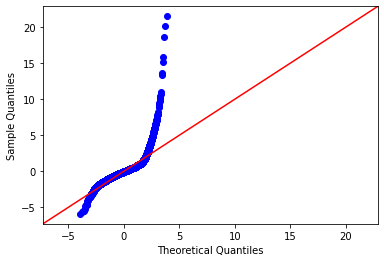

Train RMSE: 202977.24191666723
Test RMSE: 197215.46565354633


In [114]:
df5 = df4.drop(columns = 'date')
evaluate_model(df5)

Sick!

### Investigating Categorical Variables

While date as a categorical variable didn't help, let's see if casting some of the others we identified as categorical candidates in our pairplot improves our fit.

In [98]:
def test_dummies(dataframe, candidates):
    for candidate in candidates:
        dummies = pd.get_dummies(dataframe[candidate], prefix = candidate, drop_first = True)
        df_with_dummies = pd.concat([dataframe,dummies], axis = 1)
        df_with_dummies.drop(columns = candidate, inplace = True)
        print(f'Candidate: {candidate}')
        evaluate_model(df_with_dummies)

Have to clean up a few columns since `pd.get_dummies` doesn't work well when it tries to make floats into column names.

In [116]:
df5['floors'] = df5.floors.astype(int)
df5['waterfront'] = df5.waterfront.astype(int)
df5['view'] = df5.view.astype(int)

Candidate: floors
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2777.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:29   Log-Likelihood:            -2.9204e+05
No. Observations:               21425   AIC:                         5.841e+05
Df Residuals:                   21406   BIC:                         5.843e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.327e+07   2

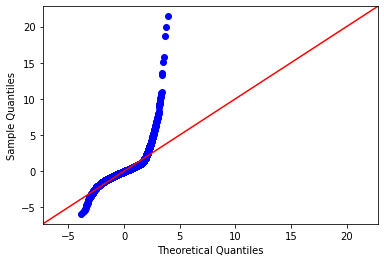

Train RMSE: 204698.9147125331
Test RMSE: 190637.71332146804
Candidate: waterfront
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2930.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:29   Log-Likelihood:            -2.9207e+05
No. Observations:               21425   AIC:                         5.842e+05
Df Residuals:                   21407   BIC:                         5.843e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

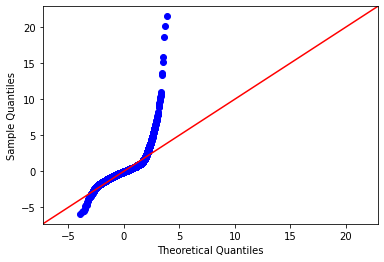

Train RMSE: 202837.53446487532
Test RMSE: 197670.04913506893
Candidate: view
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2508.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:30   Log-Likelihood:            -2.9202e+05
No. Observations:               21425   AIC:                         5.841e+05
Df Residuals:                   21404   BIC:                         5.842e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

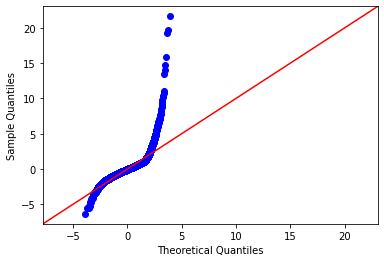

Train RMSE: 203647.82622435308
Test RMSE: 192930.3418875394
Candidate: grade
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     2204.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:30   Log-Likelihood:            -2.9100e+05
No. Observations:               21425   AIC:                         5.820e+05
Df Residuals:                   21398   BIC:                         5.823e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

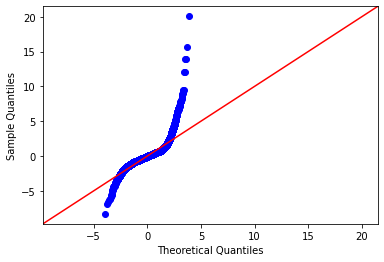

Train RMSE: 191686.3349849224
Test RMSE: 192173.19832195286
Candidate: zipcode
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1052.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:30   Log-Likelihood:            -2.8731e+05
No. Observations:               21425   AIC:                         5.748e+05
Df Residuals:                   21339   BIC:                         5.755e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

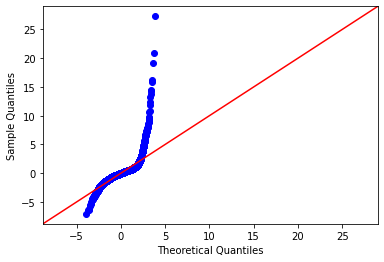

Train RMSE: 157674.30042737155
Test RMSE: 172770.076360904
Candidate: reno_bool
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2930.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:30   Log-Likelihood:            -2.9207e+05
No. Observations:               21425   AIC:                         5.842e+05
Df Residuals:                   21407   BIC:                         5.843e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

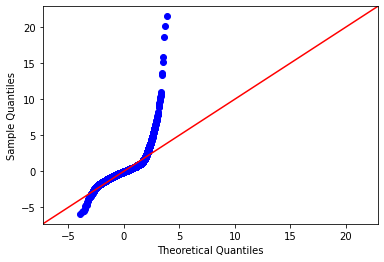

Train RMSE: 206272.03246070794
Test RMSE: 186934.81932870304
Candidate: bedrooms
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1931.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:09:31   Log-Likelihood:            -2.9201e+05
No. Observations:               21425   AIC:                         5.841e+05
Df Residuals:                   21398   BIC:                         5.843e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

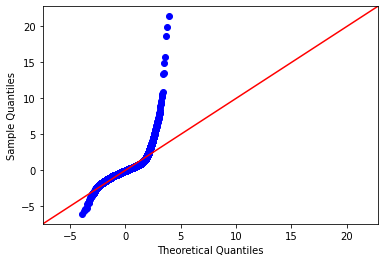

Train RMSE: 197178.21627768458
Test RMSE: 212372.08585918418


In [117]:
candidates = ['floors', 'waterfront', 'view', 'grade', 'zipcode', 'reno_bool', 'bedrooms']
test_dummies(df5, candidates)

So, for `waterfront` and `reno_bool`, the model fit did not improve. For `bedrooms`, `floors`, and `view` the model improved very slightly. However, in the case of `grade` it increased the R<sup>2</sup> by nearly .03, and in the case of `zipcode`, it increased it by just over .1, which is huge. The QQ plots seem to look more or less the same, however. Also, in many candidates, some of the categories do not have significance according to their p values. According to the internet, I should still keep these columns. Another thing to note is that for every one except where `floors` are categorized, it has a really high p-value. Does that indicate it is only useful when categorized? Finally, when looking at RMSE's values only decrease noticeably for `grade` and `zipcode`, as with R<sup>2</sup>. I am thinking that for `reno_bool` knowing whether or not is has ever been renovated is perhaps not as useful as knowing how long ago it was renovated. However, since a large majority have never been renovated, I think it will be best to first drop rows that have been renovated in 2010 or after, since we will likely not want to buy them based on our business objective, and then second drop both columns `yr_renovated` and `reno_bool`. While if more had been renovated at some point, and we could get more information about how recently a home has to have bene renovated to increase sale price, that would be useful, but since most of the values in yr_renovated are simply 0, which doesn't make sense to fit in a model, we will just remove it.

In [154]:
df6 = df5.drop(index = df5[df5.yr_renovated >= 2010].index)
df6 = df6.drop(columns = ['yr_renovated','reno_bool']).reset_index()
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21278 entries, 0 to 21277
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21278 non-null  int64  
 1   price          21278 non-null  float64
 2   bedrooms       21278 non-null  int64  
 3   bathrooms      21278 non-null  float64
 4   sqft_lot       21278 non-null  int64  
 5   floors         21278 non-null  int32  
 6   waterfront     21278 non-null  int32  
 7   view           21278 non-null  int32  
 8   grade          21278 non-null  int64  
 9   sqft_above     21278 non-null  int64  
 10  sqft_basement  21278 non-null  float64
 11  yr_built       21278 non-null  int64  
 12  zipcode        21278 non-null  int64  
 13  lat            21278 non-null  float64
 14  long           21278 non-null  float64
 15  sqft_living15  21278 non-null  int64  
 16  sqft_lot15     21278 non-null  int64  
dtypes: float64(5), int32(3), int64(9)
memory usage: 2.